# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import acquire
import prepare
import encode
import explore
import features

# Wrangle

In [2]:
#bring in the data
telco = acquire.get_telco_data()

In [3]:
#prep the data
train, test, validate = prepare.prep_telco(telco, .8, 123)

In [4]:
#encode the data
train, test, validate = encode.encoded_df(train, test, validate)

In [5]:
print(train.shape)
print(test.shape)
print(validate.shape)

(4507, 30)
(1409, 30)
(1127, 30)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4507 entries, 1249 to 6958
Data columns (total 30 columns):
customer_id                      4507 non-null object
gender                           4507 non-null object
senior_citizen                   4507 non-null int64
partner                          4507 non-null object
dependents                       4507 non-null object
tenure                           4507 non-null int64
phone_service                    4507 non-null object
multiple_lines                   4507 non-null object
online_security                  4507 non-null object
online_backup                    4507 non-null object
device_protection                4507 non-null object
tech_support                     4507 non-null object
streaming_tv                     4507 non-null object
streaming_movies                 4507 non-null object
paperless_billing                4507 non-null object
monthly_charges                  4507 non-null float64
total_charges              

In [7]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'tenure_years', 'contract_type_encoded',
       'encoded_internet_service_type', 'churn_encoded',
       'payment_type_encoded', 'online_security_encoded',
       'tech_support_encoded', 'device_protection_encoded',
       'online_backup_encoded'],
      dtype='object')

# Explore
**Initial Hypothesis**: Customers who are month to month are most likely to churn

1. Look at the features that describe the consumer portions of our data, this will help us figure out **WHO** is churning
    - Gender
    - Senior or Not
    - Single household (dependents)
2. Run a Chi-Squared statistical test to see if there is a correlation between the above and churning
3. Take a look at all other components to look for the **DRIVERS** that are causing our customers to churn

In [8]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,payment_type,tenure_years,contract_type_encoded,encoded_internet_service_type,churn_encoded,payment_type_encoded,online_security_encoded,tech_support_encoded,device_protection_encoded,online_backup_encoded
1249,0484-FFVBJ,Male,0,No,No,32,Yes,No,No,No,...,Bank transfer (automatic),3.0,1,0,0,0,0,0,0,0
6265,6096-EGVTU,Female,0,Yes,Yes,64,Yes,Yes,No internet service,No internet service,...,Mailed check,5.0,1,2,0,3,1,1,1,1
3772,6178-KFNHS,Female,0,No,Yes,12,Yes,Yes,Yes,No,...,Electronic check,1.0,0,1,1,2,2,0,0,0
3391,4529-CKBCL,Female,0,No,No,2,Yes,No,No,No,...,Electronic check,0.0,0,1,1,2,0,0,0,0
6795,6048-NJXHX,Male,0,Yes,No,41,Yes,No,No internet service,No internet service,...,Electronic check,3.0,2,2,0,2,1,1,1,1


## Chi Testing

Our alpha for each Chi Test will be set at 95%

In [9]:
alpha = .05

### Senior citizen VS churning
$H_0$ - Being a senior citizen is independent of churning

In [10]:
is_senior_citizen_ctab = pd.crosstab(train.senior_citizen, train.churn_encoded)

In [11]:
is_senior_citizen_ctab

churn_encoded,0,1
senior_citizen,,
0,2861,899
1,443,304


In [12]:
chi2, p_senior, degf, expected_senior = stats.chi2_contingency(is_senior_citizen_ctab)
print(expected_senior)
print(f"p-val: {p_senior}")

if p_senior < alpha:
    print("We reject the H_0: Being a senior citizen is independent of churning")
else:
    print("We fail to reject H_0")

[[2756.38784114 1003.61215886]
 [ 547.61215886  199.38784114]]
p-val: 4.174502062740765e-21
We reject the H_0: Being a senior citizen is independent of churning


In [13]:
if p_senior < alpha:
    print("We reject the H_0: Being a senior citizen is independent of churning")
else:
    print("We fail to reject H_0")

We reject the H_0: Being a senior citizen is independent of churning


#### Takeaways
- Our p value is less than $\alpha\$ which signifies there is a statistical significance
- There's roughly a 65% increase in the number of seniors who churned from expected to observed

In [14]:
#take a look at stats info for numerical data
train.tenure.describe()

count    4507.000000
mean       31.942978
std        24.718649
min         0.000000
25%         8.000000
50%        27.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

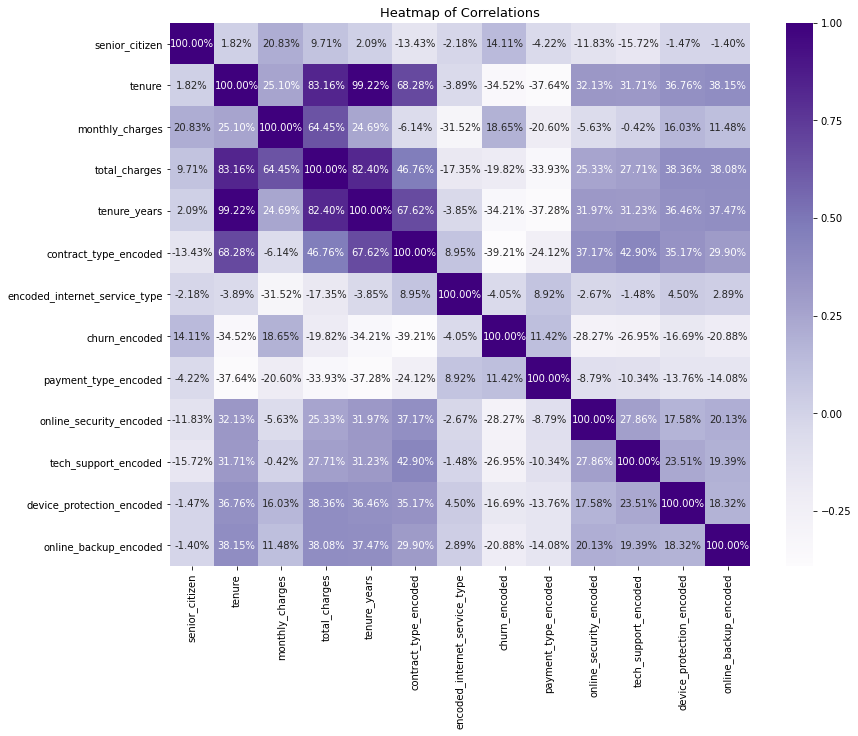

In [15]:
#take a look at correlations of numerical data
explore.corr_heatmap(train)

### Takeaways
- mean for tenure is roughly 2 and a half years
- our max tenure is sitting at 6 years
- contract type seems to be our best indicator of whether a customer will churn or not


### Moving Forward
- Check tenure against various features

## Tenure vs rate of churn

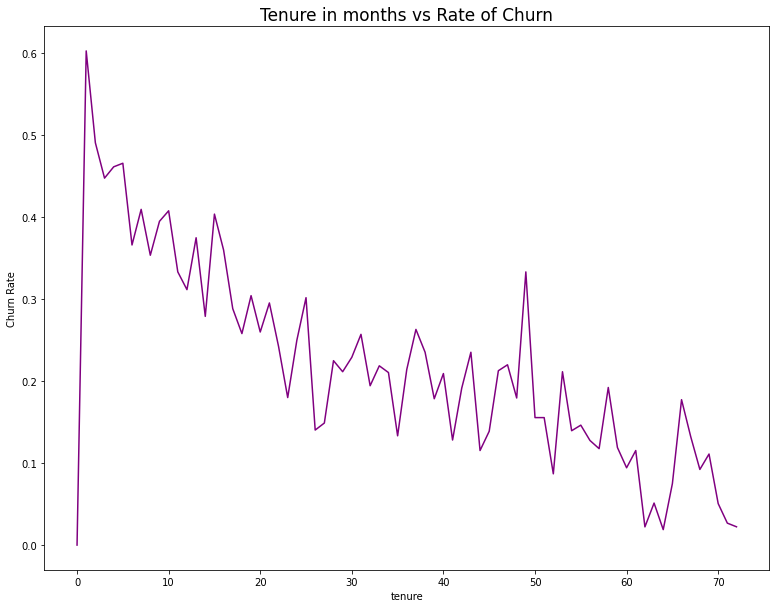

In [16]:
#function to plot rate of churn and tenure
explore.lineplot_rate_of_churn_to_tenure_months(train)

In [17]:
train.tenure.value_counts(ascending=False)

1     403
72    224
2     165
3     134
4     117
     ... 
33     32
36     28
39     28
44     26
0      10
Name: tenure, Length: 73, dtype: int64

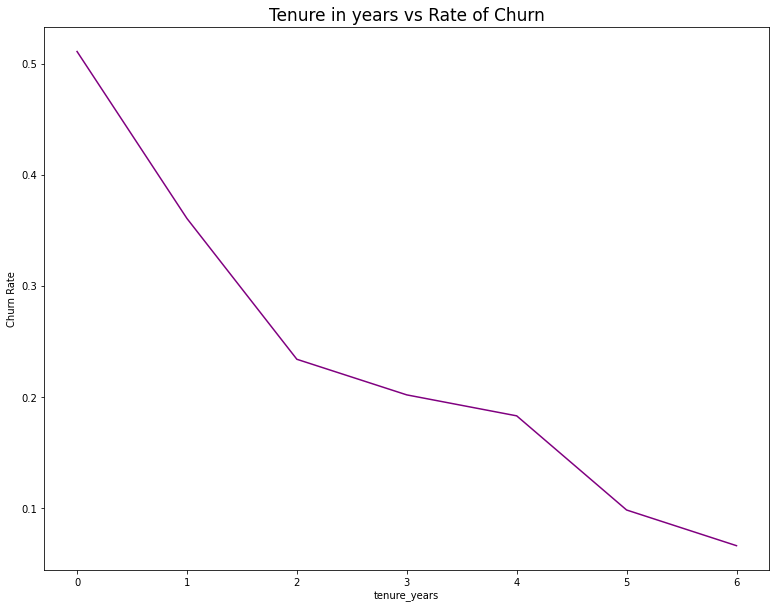

In [18]:
explore.lineplot_rate_of_churn_to_tenure_years(train)

In [19]:
train.tenure_years.value_counts(ascending=False)

0.0    988
1.0    740
2.0    675
6.0    664
4.0    546
5.0    498
3.0    396
Name: tenure_years, dtype: int64

### Takeaways on tenure vs rate of churn: 
We see most customers are churning at lower tenures with a spike right around 49 months. Overall there is a downward trend as tenure increases. However this may also be because most of our customers tenures are below 1 year

## Categorical exploration

In [20]:
ctab = pd.crosstab(train.churn, train.contract_type)
ctab

contract_type,Month-to-month,One year,Two year
churn,,,
No,1432,826,1046
Yes,1062,108,33


Takeaways:
- Far more customers who are on month to month contracts

In [21]:
def plot_categorical_with_churn_rates(df, column_name):
    plt.figure(figsize=(10, 7))
    plt.title(f"Churn Rates by {column_name}")
    df.groupby(column_name).churn_encoded.mean().plot.bar(ec='black', fc='purple', width=.9, label='')
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('Churn Rate')
    plt.hlines(df.churn_encoded.mean(), *plt.xlim(), ls='--', color='grey', label='average churn rate')
    plt.legend()
    
def plot_all_categoricals_with_churn_rates(train):
    #1. plot contract_type
    plot_categorical_with_churn_rates(train, "contract_type")
    
    #2. plot gender_type
    plot_categorical_with_churn_rates(train, "gender")
    
    #3. plot partner
    plot_categorical_with_churn_rates(train, "partner")
    
    #4. plot dependents
    plot_categorical_with_churn_rates(train, "dependents")

    #5. plot phone_service
    plot_categorical_with_churn_rates(train, "phone_service")
    
    #6. plot multiple_lines
    plot_categorical_with_churn_rates(train, "multiple_lines")
    
    #7. plot online_security
    plot_categorical_with_churn_rates(train, "online_security")
    
    #8. plot device_protection
    plot_categorical_with_churn_rates(train, "device_protection")
    
    #9. plot device_protection
    plot_categorical_with_churn_rates(train, "online_backup")
    
    #10. plot tech_support
    plot_categorical_with_churn_rates(train, "tech_support")
    
    #11. plot streaming_tv
    plot_categorical_with_churn_rates(train, "streaming_tv")
    
    #12. plot streaming_movies
    plot_categorical_with_churn_rates(train, "streaming_movies")
    
    #13. plot paperless_billing
    plot_categorical_with_churn_rates(train, "paperless_billing")
    
    #14. plot internet_service_type
    plot_categorical_with_churn_rates(train, "internet_service_type")
    
    #15. plot payment_type
    plot_categorical_with_churn_rates(train, "payment_type")
       


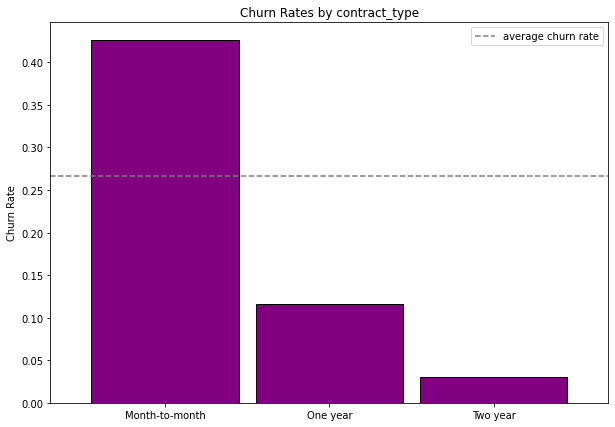

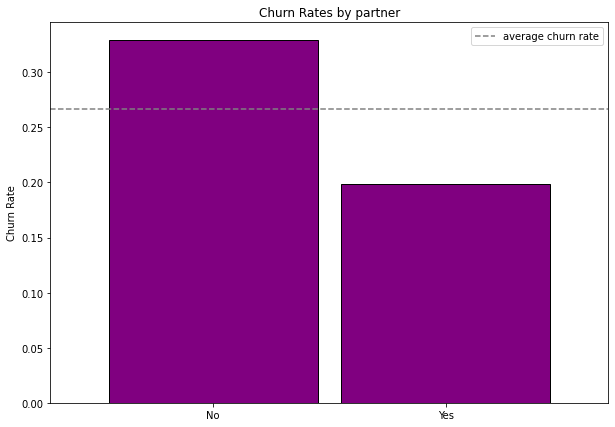

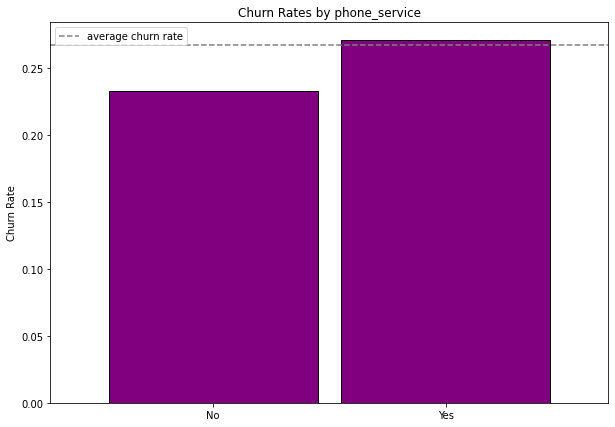

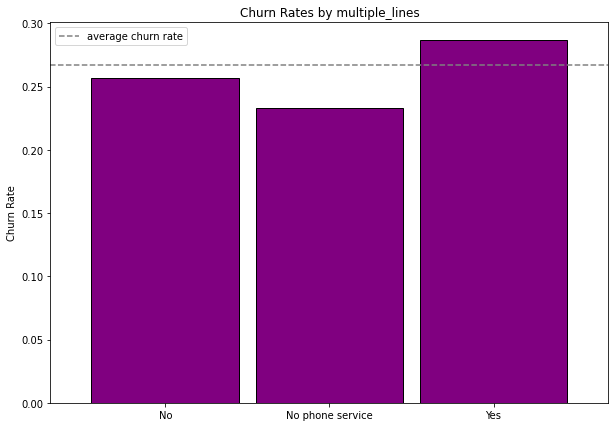

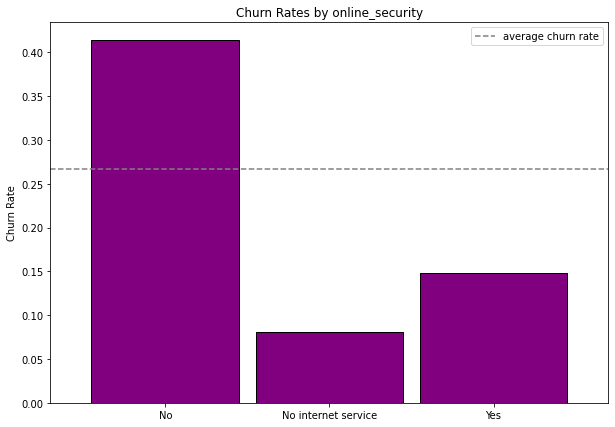

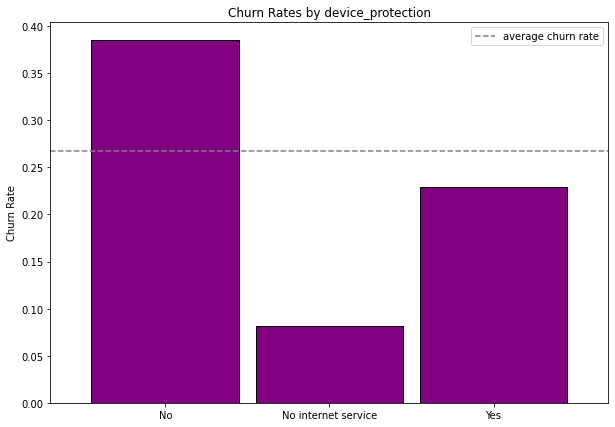

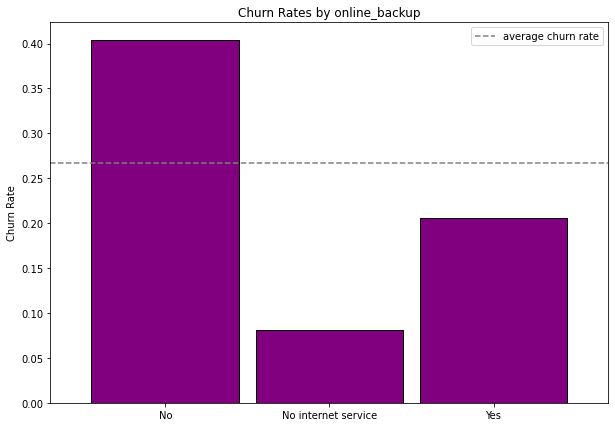

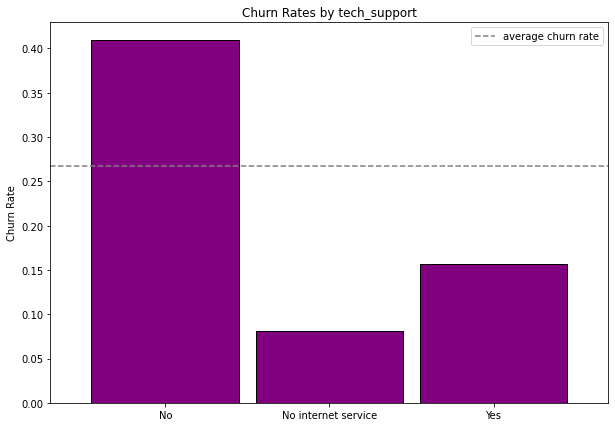

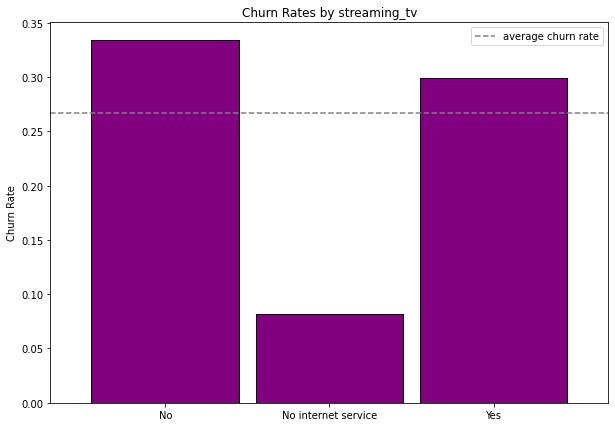

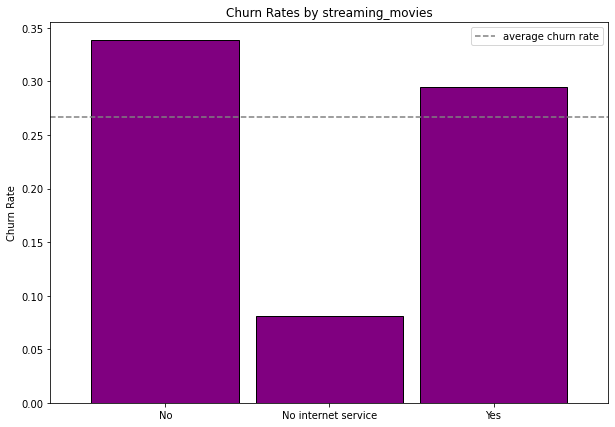

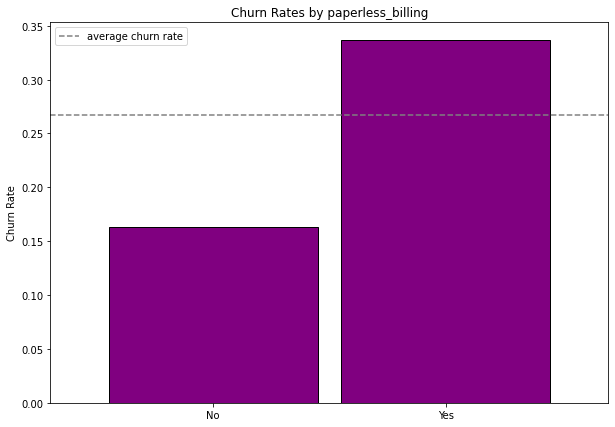

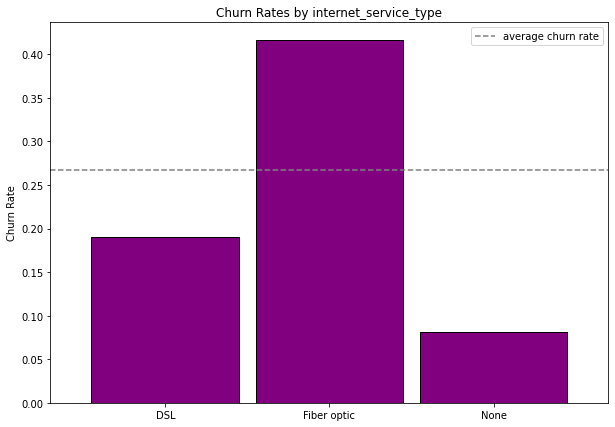

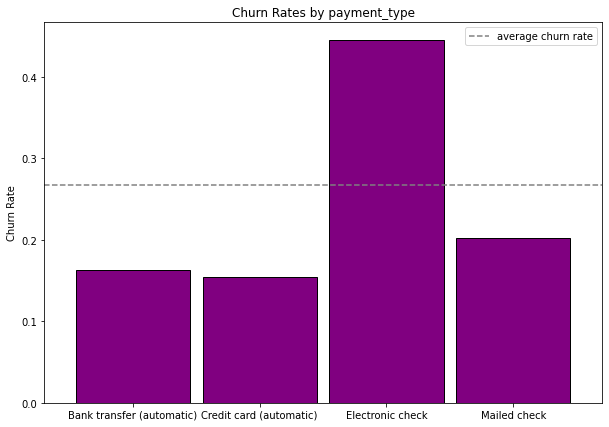

In [22]:
explore.plot_all_categoricals_with_churn_rates(train)

### Takeaways:

- As predicted Month to Month customers are more likely to churn
- Customers not receiving online security are churning at a higher rate
- Customers not receiving device protection are churning at a higher rate
- Customers not receiving online backup are churning at a higher rate
- Customers who do not receive tech support are churning at a higher rate
- Customers who receive paper bills are more likely to churn
- Fiber Optics is more likely to churn - this is surprising since this is considered a premium service.
- Customers who pay via electronic check are more likely to churn
    


 ### Moving Forward
- Check price thresholds of each of the above indicators of customers who are likely to churn with monthly charges
- Check correlations of the above indicators of customers who are likely to churn to one another
- Feature engineering to combine some features that are strongly correlated to each other
- Look to see if churn rates of month-to-month customers at the end of 12 months is the same as those who are 1 year contracts whose tenure as reached 12 months

## Price Threshold

In [23]:
train.dtypes

customer_id                       object
gender                            object
senior_citizen                     int64
partner                           object
dependents                        object
tenure                             int64
phone_service                     object
multiple_lines                    object
online_security                   object
online_backup                     object
device_protection                 object
tech_support                      object
streaming_tv                      object
streaming_movies                  object
paperless_billing                 object
monthly_charges                  float64
total_charges                    float64
churn                             object
contract_type                     object
internet_service_type             object
payment_type                      object
tenure_years                     float64
contract_type_encoded              int64
encoded_internet_service_type      int64
churn_encoded   

In [24]:
df_tenure_of_one_year = train[train.tenure == 12]

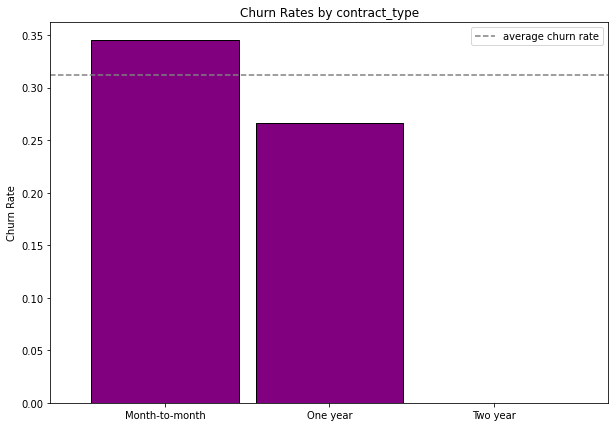

In [25]:
explore.plot_categorical_with_churn_rates(df_tenure_of_one_year, "contract_type")

In [26]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=13)

**Questions Asked**

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

In [1]:
# for every unique contract type, what is the churn percentage?
x1 = "contract_type"
x2 = "churn"
(df_tenure_of_one_year.groupby(x1)[x2]
 .apply(lambda s: s.value_counts(normalize=True)) # custom aggregation to get value counts by group
 .unstack() # turn an index into columns
 .plot.bar(stacked=True, width=.9, color="m"))
plt.title("Churn percentage for each contract type at 12 months")
plt.legend(title=x2)
plt.xticks(rotation=0)
plt.xlabel('')

NameError: name 'df_tenure_of_one_year' is not defined

### Takeaways
- customers on month to month

In [28]:
def churn_rate_for_contract_types_at_12_months(train):
    x1 = "contract_type"
    x2 = "churn"
    (train.groupby(x1)[x2]
     .apply(lambda s: s.value_counts(normalize=True)) # custom aggregation to get value counts by group
     .unstack() # turn an index into columns
     .plot.bar(stacked=True, width=.9, color="bg"))
    plt.title("Churn percentage for each contract type at 12 months")
    plt.legend(title=x2)
    plt.xticks(rotation=0)
    plt.xlabel('')

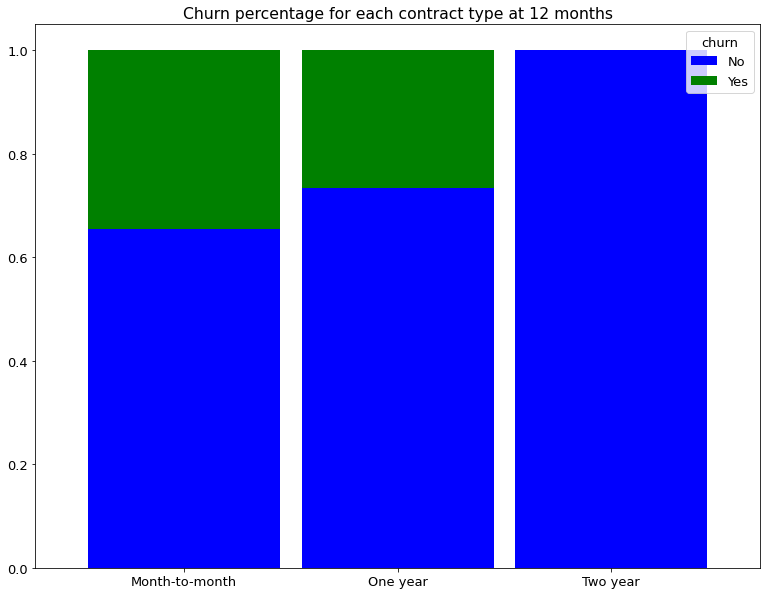

In [29]:
churn_rate_for_contract_types_at_12_months(df_tenure_of_one_year)

In [30]:
#Let's look at the mean median and mode of monthly charges and total charges for each contract type

In [31]:
monthly_charges_mean = pd.DataFrame((train.groupby("contract_type")).monthly_charges.mean())
monthly_charges_mean.columns = ['Mean monthly charges']

In [32]:
monthly_charges_median = pd.DataFrame((train.groupby("contract_type")).monthly_charges.median())
monthly_charges_median.columns = ['Median monthly charges']

In [33]:
monthly_charges_max = pd.DataFrame((train.groupby("contract_type")).monthly_charges.max())
monthly_charges_max.columns = ['Max monthly charges']

In [34]:
monthly_charges_min = pd.DataFrame((train.groupby("contract_type")).monthly_charges.min())
monthly_charges_min.columns = ['Min monthly charges']

In [35]:
monthly_charges_std = pd.DataFrame((train.groupby("contract_type")).monthly_charges.std())
monthly_charges_std.columns = ['STD monthly charges']

In [36]:
summary1 = pd.merge(monthly_charges_mean, monthly_charges_median, left_index=True, right_index=True)

In [37]:
summary2 = pd.merge(monthly_charges_max , monthly_charges_min, left_index=True, right_index=True)

In [38]:
summary3 = pd.merge(summary1 , summary2 , left_index=True, right_index=True)

In [39]:
pd.merge(summary3 , monthly_charges_std, left_index=True, right_index=True)

,Mean monthly charges,Median monthly charges,Max monthly charges,Min monthly charges,STD monthly charges
contract_type,,,,,
Month-to-month,66.105894,73.075,116.50,18.80,26.719017
One year,65.155407,67.275,118.60,18.25,31.871457
Two year,61.439574,64.700,118.75,18.55,34.469041


Takeaways: prices seem to be evenly distributed between all contract types

In [40]:
def stats_for_contract_types(train):
    '''
    Takes in a training dataframe and returns a new dataframe with the following:
    Min, max, std, median for each contract type
    '''
    
    monthly_charges_mean = pd.DataFrame((train.groupby("contract_type")).monthly_charges.mean())
    monthly_charges_mean.columns = ['Mean monthly charges']
    
    monthly_charges_median = pd.DataFrame((train.groupby("contract_type")).monthly_charges.median())
    monthly_charges_median.columns = ['Median monthly charges']
    
    monthly_charges_max = pd.DataFrame((train.groupby("contract_type")).monthly_charges.max())
    monthly_charges_max.columns = ['Max monthly charges']
    
    monthly_charges_min = pd.DataFrame((train.groupby("contract_type")).monthly_charges.min())
    monthly_charges_min.columns = ['Min monthly charges']
    
    monthly_charges_std = pd.DataFrame((train.groupby("contract_type")).monthly_charges.std())
    monthly_charges_std.columns = ['STD monthly charges']
    
    summary1 = pd.merge(monthly_charges_mean, monthly_charges_median, left_index=True, right_index=True)
    
    summary2 = pd.merge(monthly_charges_max , monthly_charges_min, left_index=True, right_index=True)
    
    summary3 = pd.merge(summary1 , summary2 , left_index=True, right_index=True)
    
    df = pd.merge(summary3 , monthly_charges_std, left_index=True, right_index=True)
    
    return df

In [41]:
df = stats_for_contract_types(train)

In [42]:
df

,Mean monthly charges,Median monthly charges,Max monthly charges,Min monthly charges,STD monthly charges
contract_type,,,,,
Month-to-month,66.105894,73.075,116.50,18.80,26.719017
One year,65.155407,67.275,118.60,18.25,31.871457
Two year,61.439574,64.700,118.75,18.55,34.469041


In [43]:
train.groupby(["senior_citizen"])[["churn_encoded","monthly_charges","tenure","total_charges"]].mean()

,churn_encoded,monthly_charges,tenure,total_charges
senior_citizen,,,,
0,0.239096,62.017301,31.742553,2158.213085
1,0.406961,78.757028,32.951807,2749.160977


In [44]:
train.senior_citizen.mean()

0.16574217883292655

**Takeaways**:

Senior Citizens make up approximately 17% percent of our customer base and of those approximately 41% are churning. They also have higher monthly charges compared to non-seniors (roughly $17 more)

They are not our target market but maybe offering some incentives to keep them from churning like a discount on monthly charges based on their tenure


In [45]:
## Feature engineering

In [46]:
train, test, validate = features.online_features(train, test, validate)

In [47]:
train.dtypes

customer_id                       object
gender                            object
senior_citizen                     int64
partner                           object
dependents                        object
tenure                             int64
phone_service                     object
multiple_lines                    object
online_security                   object
online_backup                     object
device_protection                 object
tech_support                      object
streaming_tv                      object
streaming_movies                  object
paperless_billing                 object
monthly_charges                  float64
total_charges                    float64
churn                             object
contract_type                     object
internet_service_type             object
payment_type                      object
tenure_years                     float64
contract_type_encoded              int64
encoded_internet_service_type      int64
churn_encoded   

In [48]:
df = train[["churn", "churn_encoded", "contract_type_encoded", "online_features"]]

In [49]:
df.corr()

,churn_encoded,contract_type_encoded,online_features
churn_encoded,1.000000,-0.392097,-0.342899
contract_type_encoded,-0.392097,1.000000,0.550483
online_features,-0.342899,0.550483,1.000000


In [51]:
def encode_all_columns_for_train_df(train):
    '''Takes in all columns from training dataset and encodes them
    return new columns for each column encoded'''
    for column in train.columns:
        le = LabelEncoder()
        le.fit(train[column])
        train["encoded_" + column] = le.transform(train[column])

def drop_useless_encoded_columns(df):
    '''Drops uneeded encoded columns'''
    df.drop(columns=['encoded_tenure_years', 'encoded_tenure', 'encoded_monthly_charges', 'encoded_total_charges'], inplace=True)
    return df

In [52]:
encode_all_columns_for_train_df(train)
drop_useless_encoded_columns(train)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,encoded_payment_type,encoded_contract_type_encoded,encoded_encoded_internet_service_type,encoded_churn_encoded,encoded_payment_type_encoded,encoded_online_security_encoded,encoded_tech_support_encoded,encoded_device_protection_encoded,encoded_online_backup_encoded,encoded_online_features
1249,0484-FFVBJ,Male,0,No,No,32,Yes,No,No,No,...,0,1,0,0,0,0,0,0,0,0
6265,6096-EGVTU,Female,0,Yes,Yes,64,Yes,Yes,No internet service,No internet service,...,3,1,2,0,3,1,1,1,1,2
3772,6178-KFNHS,Female,0,No,Yes,12,Yes,Yes,Yes,No,...,2,0,1,1,2,2,0,0,0,1
3391,4529-CKBCL,Female,0,No,No,2,Yes,No,No,No,...,2,0,1,1,2,0,0,0,0,0
6795,6048-NJXHX,Male,0,Yes,No,41,Yes,No,No internet service,No internet service,...,2,2,2,0,2,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,1,2,0,0,1,2,2,0,0,3
817,6629-CZTTH,Male,0,No,No,1,Yes,No,No,No,...,3,0,0,1,3,0,0,0,0,0
901,7377-DMMRI,Male,0,No,No,2,Yes,No,Yes,No,...,2,0,0,1,2,2,0,0,0,1
1987,3400-ESFUW,Male,0,Yes,Yes,55,Yes,No,Yes,Yes,...,0,2,0,1,0,2,2,0,2,3


In [53]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'tenure_years', 'contract_type_encoded',
       'encoded_internet_service_type', 'churn_encoded',
       'payment_type_encoded', 'online_security_encoded',
       'tech_support_encoded', 'device_protection_encoded',
       'online_backup_encoded', 'online_features', 'encoded_customer_id',
       'encoded_gender', 'encoded_senior_citizen', 'encoded_partner',
       'encoded_dependents', 'encoded_phone_service', 'encoded_multiple_lines',
       'encoded_online_security', 'encoded_online_backup',
       'encoded_device_protection', 'encoded_tech_support',
       'encoded_streaming_tv', 'encoded_streaming_mov

In [71]:
encoded_df = train[['encoded_senior_citizen', 'encoded_partner',
       'encoded_dependents', 'encoded_phone_service', 'encoded_multiple_lines',
       'encoded_online_security', 'encoded_online_backup',
       'encoded_device_protection', 'encoded_tech_support',
       'encoded_streaming_tv', 'encoded_streaming_movies',
       'encoded_paperless_billing', 'encoded_churn', 'encoded_contract_type',
       'encoded_payment_type']]

In [72]:
encoded_df

,encoded_senior_citizen,encoded_partner,encoded_dependents,encoded_phone_service,encoded_multiple_lines,encoded_online_security,encoded_online_backup,encoded_device_protection,encoded_tech_support,encoded_streaming_tv,encoded_streaming_movies,encoded_paperless_billing,encoded_churn,encoded_contract_type,encoded_payment_type
1249,0,0,0,1,0,0,0,0,0,2,2,1,0,1,0
6265,0,1,1,1,2,1,1,1,1,1,1,0,0,1,3
3772,0,0,1,1,2,2,0,0,0,0,0,1,1,0,2
3391,0,0,0,1,0,0,0,0,0,2,0,1,1,0,2
6795,0,1,0,1,0,1,1,1,1,1,1,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0,0,0,0,1,2,0,0,2,2,0,0,0,2,1
817,0,0,0,1,0,0,0,0,0,0,2,1,1,0,3
901,0,0,0,1,0,2,0,0,0,0,0,1,1,0,2
1987,0,1,1,1,0,2,2,0,2,0,0,0,1,2,0


In [73]:
#Relationships between above categories
encoded_df.corr()

,encoded_senior_citizen,encoded_partner,encoded_dependents,encoded_phone_service,encoded_multiple_lines,encoded_online_security,encoded_online_backup,encoded_device_protection,encoded_tech_support,encoded_streaming_tv,encoded_streaming_movies,encoded_paperless_billing,encoded_churn,encoded_contract_type,encoded_payment_type
encoded_senior_citizen,1.000000,0.013719,-0.216010,0.004530,0.141402,-0.118270,-0.014035,-0.014718,-0.157180,0.042982,0.036735,0.147459,0.141112,-0.134260,-0.042204
encoded_partner,0.013719,1.000000,0.439686,0.022944,0.158334,0.137614,0.147798,0.172441,0.116516,0.154218,0.139087,-0.004619,-0.147175,0.303633,-0.164064
encoded_dependents,-0.216010,0.439686,1.000000,-0.000546,-0.009896,0.155821,0.101730,0.089420,0.145431,0.049255,0.034209,-0.117371,-0.172466,0.257295,-0.055410
encoded_phone_service,0.004530,0.022944,-0.000546,1.000000,-0.021695,-0.022124,0.022549,-0.008407,-0.013986,0.054730,0.034393,0.023428,0.025260,-0.006061,-0.014625
encoded_multiple_lines,0.141402,0.158334,-0.009896,-0.021695,1.000000,0.007421,0.113757,0.123768,0.022330,0.175783,0.178074,0.156206,0.031231,0.124987,-0.178325
encoded_online_security,-0.118270,0.137614,0.155821,-0.022124,0.007421,1.000000,0.201306,0.175811,0.278561,0.038809,0.056603,-0.164280,-0.282710,0.371724,-0.087916
encoded_online_backup,-0.014035,0.147798,0.101730,0.022549,0.113757,0.201306,1.000000,0.183234,0.193931,0.153520,0.138657,-0.012627,-0.208766,0.299040,-0.140798
encoded_device_protection,-0.014718,0.172441,0.089420,-0.008407,0.123768,0.175811,0.183234,1.000000,0.235080,0.280066,0.285596,-0.040559,-0.166929,0.351680,-0.137616
encoded_tech_support,-0.157180,0.116516,0.145431,-0.013986,0.022330,0.278561,0.193931,0.235080,1.000000,0.161483,0.173325,-0.113887,-0.269491,0.429020,-0.103424
encoded_streaming_tv,0.042982,0.154218,0.049255,0.054730,0.175783,0.038809,0.153520,0.280066,0.161483,1.000000,0.435019,0.100008,-0.038331,0.229299,-0.117798


In [ ]:
encoded_df